<a href="https://colab.research.google.com/github/RDGopal/Prompt-Engineering-Guide/blob/main/Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling
Topic Modeling is a type of statistical modeling for discovering the abstract "topics" that occur in a collection of documents. It is a frequent technique in text mining for uncovering hidden semantic structures in a text body. This process is useful in various applications like organizing large archives of texts, summarizing information, and aiding in understanding the main themes of texts without reading them in full. We will look at several techniques for topic modeling including LDA, LSA, NMF and BERTopic.

# Key Concepts for LDA
**Latent Dirichlet Allocation (LDA)**

LDA is the most popular topic modeling technique. It assumes documents are a mixture of topics and that topics are distributions over words. LDA back-calculates to find the set of topics that are likely to have generated the collection of documents.

**Corpus and Dictionary**

Corpus: A collection of text documents.

Dictionary: A mapping of every unique word to an index.

**Document-Term Matrix (DTM)**

This matrix represents documents as rows and terms (words) as columns, with values representing the frequency of each term in each document. It is critical for analyzing and feeding data into LDA models.

**Gibbs Sampling and Variational Inference**

These are techniques for estimating the underlying probability distributions in LDA.

**Perplexity and Coherence Score**

Metrics used to evaluate the performance of a topic model. Lower perplexity and higher coherence scores generally indicate better model performance.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download() to look at options

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [ ]:
# Function to preprocess the data
def preprocess_texts(documents):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    preprocessed_texts = []
    for text in documents:
        text = text.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_texts.append(tokens)  # Append list of tokens directly, without joining them into a string

    return preprocessed_texts


In [ ]:
# Sample data and preprocessing
documents = [
    "Sugar is bad to consume. My sister likes to have sugar, but not my father.",
    "My father spends a lot of time driving my brother around to baseball practice.",
    "Some health experts suggest that driving may cause increased stress and blood pressure.",
    "I often feel pressure to perform well at school, but my father never seems to drive my sister to do better.",
    "Health professionals say that Sugar is not good for your lifestyle."
]

# 'texts' will be a list of lists of tokens
texts = preprocess_texts(documents)

dictionary = Dictionary(texts)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
# Set parameters
num_topics = 2
passes = 10

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Display the topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.056*"driving" + 0.056*"father" + 0.055*"baseball" + 0.055*"time" + 0.055*"around"')
(1, '0.066*"sugar" + 0.047*"sister" + 0.047*"pressure" + 0.047*"health" + 0.047*"father"')


The variations in output each time you run an LDA model are due to the stochastic nature of the algorithms used in Latent Dirichlet Allocation. Here are the key reasons for these variations:

Random Initialization: Most LDA implementations (including gensim) start with a random initialization of the topic assignments for each word. This randomness affects the subsequent updates and iterations of the algorithm.

Sampling Methods: LDA often uses sampling methods like Gibbs sampling or variational Bayes inference to estimate the distributions of topics over words and documents. These methods inherently involve randomness, which can lead to different results each time the model is trained, especially if the number of iterations is not large enough to reach convergence.

Convergence Issues: If the LDA model doesn't fully converge due to too few iterations or poor parameter settings (like learning rates), the output may vary significantly between runs. Achieving convergence in probabilistic models can be challenging and might require tuning parameters such as the number of iterations and choosing appropriate hyperparameters (like alpha and beta for LDA).

Number of Topics: The choice of the number of topics (num_topics) can also influence the stability of your topics. Too few or too many topics can lead to overfitting or underfitting, respectively, making the model sensitive to initial conditions or specific samples of data.

## Ensuring Consistency

To reduce the variability in your LDA models, you can take the following steps:

Set a Random Seed: Most LDA implementations allow you to set a random seed to make the results reproducible. This is done by fixing the seed for the random number generator used by the model.

Increase the Number of Iterations: Allowing more iterations can help the model converge more consistently, which, in turn, makes the output more stable.

Tune Hyperparameters: Adjusting the hyperparameters, such as alpha (document-topic density) and beta (topic-word density), can help in achieving better and more consistent results. These parameters control the sparsity of the topics extracted by the model.

Extensive Preprocessing: More consistent and thorough preprocessing of the text data can lead to less noise in the input, which helps stabilize the output.

```
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',  # can be set as a scalar like '0.01' or 'auto' for learning the optimal alpha
    eta='auto'     # eta is another name for beta in gensim, similarly settable
)
```




In [ ]:
# Set parameters
num_topics = 3
passes = 100

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes,random_state=100)

# Display the topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.083*"health" + 0.048*"driving" + 0.048*"increased" + 0.048*"may" + 0.048*"suggest"')
(1, '0.056*"sister" + 0.056*"pressure" + 0.056*"perform" + 0.056*"often" + 0.056*"seems"')
(2, '0.084*"sugar" + 0.083*"father" + 0.048*"spends" + 0.048*"baseball" + 0.048*"around"')


#Coherence Score
Coherence measures the degree of semantic similarity between high scoring words in the topic. These scores help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Coherence Score: 0.35277825048982697


# Number of Topics

[0.3076742654074003, 0.35277825048982697, 0.36186683579444917, 0.3833486338856585]


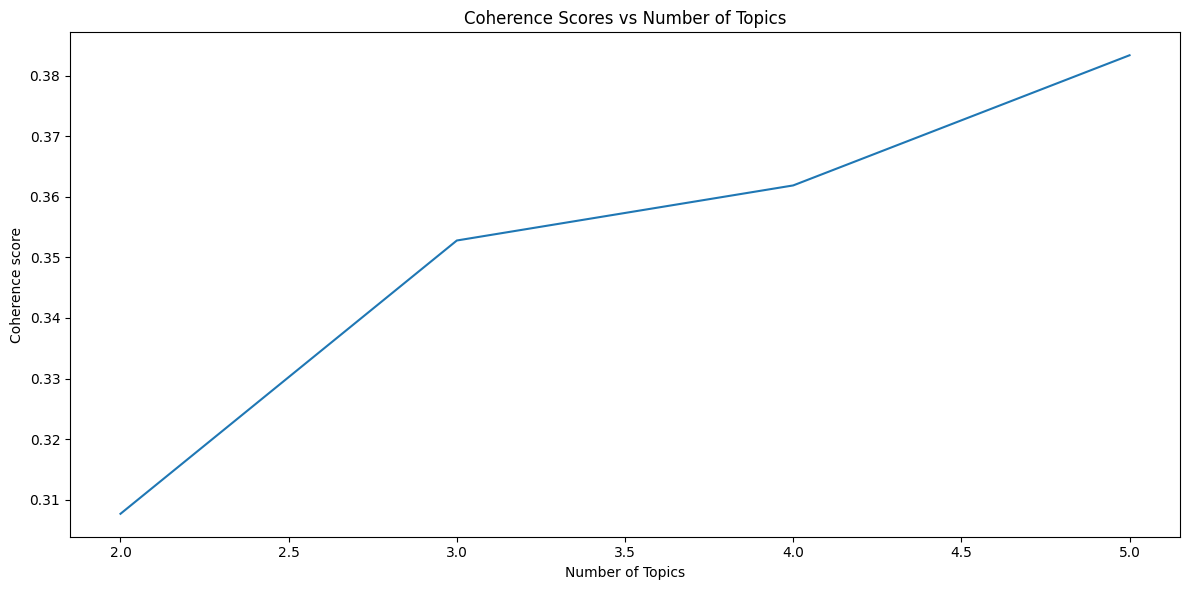

In [ ]:
import matplotlib.pyplot as plt

# Range of topics to evaluate
topic_range = range(2, 6)

# List to store coherence
coherence_scores = []

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=100)
    # Initialize CoherenceModel after training the LDA model
    coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Append the coherence score
    coherence_scores.append(coherence_lda)

print(coherence_scores)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.tight_layout()
plt.show()


# LSA and NMF
Latent Semantic Analysis (LSA) and Non-negative Matrix Factorization (NMF) are techniques used for extracting topics from a set of documents, similar to Latent Dirichlet Allocation (LDA), but with different mathematical foundations and assumptions.

Latent Semantic Analysis (LSA)
LSA, also known as Latent Semantic Indexing (LSI) when applied to text documents, is primarily a technique for reducing the dimensions of text data. It utilizes singular value decomposition (SVD), a fundamental matrix factorization method, to decompose the term-document matrix (a matrix representation of the text data).

How It Works:

Matrix Representation: Documents are represented as a matrix, where rows correspond to terms (words) and columns correspond to documents.
SVD: The matrix is decomposed into three smaller matrices
�
U,
�
S, and
�
�
V
T
  using singular value decomposition:
�
U (term-concept matrix) contains terms and their associations to "concepts".
�
S (diagonal matrix) contains singular values that weigh each concept.
�
�
V
T
  (concept-document matrix) links concepts to documents.
Dimension Reduction: By truncating the matrices
�
U,
�
S, and
�
�
V
T
  to keep only the top
�
k singular values (and corresponding vectors), LSA reduces the dimensionality, capturing the most significant underlying structures or "concepts".
Interpretation: The truncated matrices reflect the most meaningful associations between terms and documents, effectively grouping similar terms and similar documents.
Applications: LSA is used for noise reduction, improving the accuracy of text retrieval systems, and grouping similar documents and terms. It can also handle synonyms effectively by mapping related terms to similar concepts.

Non-negative Matrix Factorization (NMF)
Concept: NMF is another matrix factorization technique, but unlike SVD used in LSA, NMF imposes a non-negativity constraint on the matrices it decomposes. This constraint means all entries in the matrices are zero or positive, making the resulting components easier to interpret.

How It Works:

Matrix Representation: Similar to LSA, documents are represented in a matrix format.
Factorization: NMF factorizes the matrix
�
V (documents as columns and features as rows) into two matrices
�
W (feature-component matrix) and
�
H (component-coefficient matrix):
�
W: Represents how much each feature contributes to each component (topic).
�
H: Represents how much each component contributes to each document.
Constraints: Both
�
W and
�
H have only non-negative values, which aligns well with the additive nature of combining topics to form documents.
Interpretation: Components (or topics) can be directly interpreted as clusters of words (from
�
W) that frequently occur together in similar documents.
Applications: NMF is widely used in topic modeling where topics are represented as additive combinations of word frequencies and each document is a linear combination of topics. Its non-negative constraints often lead to a more interpretable decomposition than LSA or PCA.

Comparison and Use Cases
Interpretability: NMF often provides more interpretable topics than LSA because of the non-negativity constraint, which aligns better with the intuitive notion of adding up features to form a dataset.
Handling of Synonyms and Polysemy: LSA can handle synonyms better due to its dimensional reduction approach, but it struggles with polysemy (words with multiple meanings) because all occurrences of a word are mapped to a single point in semantic space.
Usage: LSA is often preferred for tasks involving similarity and information retrieval due to its robust handling of noise and ability to capture underlying semantic patterns. NMF is favored for clustering and classification tasks where interpretability of components (topics) is crucial.
Both LSA and NMF are valuable tools in the text mining and information retrieval toolkit, chosen based on the specific requirements of clarity, ease of interpretation, and the nature of the text data.

In [ ]:
from gensim.models import LdaModel,CoherenceModel,TfidfModel,Nmf,LsiModel

In [ ]:
# train LSA model
num_topics = 4
lsa_model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary,random_seed=100)
topics = lsa_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

coherence_model_lsa = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score:', coherence_lsa)

(0, '0.406*"father" + 0.323*"sister" + 0.290*"pressure" + 0.273*"sugar" + 0.207*"often"')
(1, '-0.359*"driving" + -0.304*"health" + -0.271*"may" + -0.271*"blood" + -0.271*"increased"')
(2, '-0.594*"sugar" + -0.231*"consume" + -0.231*"like" + -0.231*"bad" + 0.225*"pressure"')
(3, '0.298*"lot" + 0.298*"spends" + 0.298*"brother" + 0.298*"practice" + 0.298*"around"')
Coherence Score: 0.28715627951357736


In [ ]:
# train NMF model
nmf_model = Nmf(corpus,id2word=dictionary, num_topics=num_topics,passes=20,random_state=100)
topics = nmf_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

coherence_model_nmf = CoherenceModel(model=nmf_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('Coherence Score:', coherence_nmf)


(0, '0.168*"health" + 0.166*"say" + 0.166*"lifestyle" + 0.166*"professional" + 0.166*"good"')
(1, '0.096*"father" + 0.063*"around" + 0.063*"baseball" + 0.063*"time" + 0.063*"brother"')
(2, '0.102*"pressure" + 0.082*"stress" + 0.082*"may" + 0.082*"expert" + 0.082*"increased"')
(3, '0.238*"sugar" + 0.136*"sister" + 0.125*"father" + 0.119*"like" + 0.119*"bad"')
Coherence Score: 0.2597824319552638


## BERT Topic Modeling
BERTopic is a topic modeling tool that leverages transformers and language models like BERT for generating topics from textual data. Unlike traditional methods such as LDA, BERTopic utilizes contextual embeddings, which can capture the meanings of words more effectively in different contexts.

Since the example we have used thus far is too small for this technique (due to embeddings - we will discuss this later), we will use the first 100 reviews from the ``Reviews.csv`` file.

In [ ]:
pip install bertopic

In [37]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Reviews.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset and columns to identify the 'Review' column
df.head(), df.columns


In [46]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(tokens)

In [47]:
# Remove rows where 'Review' is NaN
df = df.dropna(subset=['Review'])
df['Review']= df['Review'].apply(preprocess_text)

In [48]:
# Limit the dataset to the first 100 reviews
limited_data= df['Review'].iloc[:100]

# Check the reduced data
print(limited_data.head())


1    originally bought black white recently purchas...
2    love tank material fit great love reversible h...
3    love tank comfortable flaws rolls every time w...
4    adore top comfy stylish wear little purple car...
5    love sweater definite classic get lots complim...
Name: Review, dtype: object


### BERTopic

In [ ]:
from bertopic import BERTopic

In [ ]:
# Initialize BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True)

# Fit the model on the limited data
topics, probabilities = topic_model.fit_transform(limited_data)

# Display the topic info
topic_info = topic_model.get_topic_info()
print(topic_info)

# Optionally, print individual topics
for topic in topic_model.get_topics().items():
    print(topic)

### Visualize

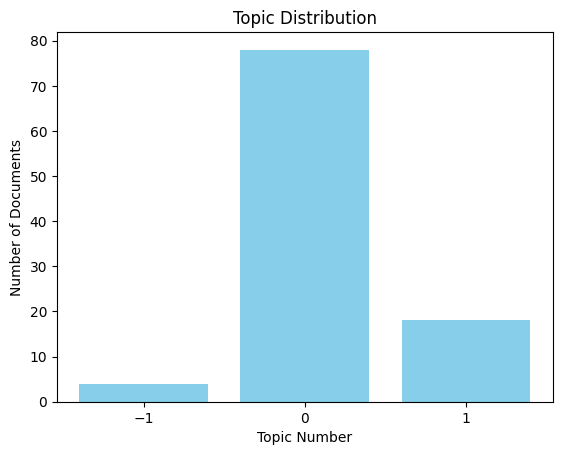

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'topics' contains the output from BERTopic
unique_topics, counts = np.unique(topics, return_counts=True)

# Simple bar chart to show topic distribution
plt.bar(unique_topics, counts, color='skyblue')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(unique_topics)
plt.show()



### Top terms for each topic

In [51]:
data = topic_model.get_topics()
rows = []
for topic, terms in data.items():
    for term, weight in terms:
        rows.append({'topic': topic, 'term': term, 'weight': weight})
df = pd.DataFrame(rows)
sorted_df = df.sort_values(by=['topic', 'weight'], ascending=[True, False])
print(sorted_df)

    topic          term    weight
0      -1      bralette  0.277402
1      -1         every  0.133741
2      -1          time  0.117307
3      -1           aka  0.091328
4      -1          glad  0.091328
5      -1    bothersome  0.091328
6      -1       durable  0.091328
7      -1       becomes  0.091328
8      -1         aside  0.091328
9      -1  conversation  0.091328
10      0          love  0.053336
11      0          size  0.044888
12      0          wear  0.040571
13      0          suit  0.038235
14      0       perfect  0.037820
15      0          like  0.037381
16      0   comfortable  0.036265
17      0         would  0.034487
18      0           fit  0.034250
19      0         dress  0.032829
20      1           bra  0.130700
21      1          wear  0.070230
22      1          fits  0.063373
23      1          tank  0.057433
24      1           cup  0.051241
25      1         great  0.050432
26      1          love  0.048261
27      1          size  0.045491
28      1     